In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
import os

In [95]:
directory_path = "../experiment/"

# Get all CSV file names in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith(".csv")]
dataframes = []
for file in csv_files:
    file_path = os.path.join(directory_path, file)
    dataframe = pd.read_csv(file_path)
    dataframes.append(dataframe)
df = pd.concat(dataframes, ignore_index=True)


In [96]:
gaze_methods = ['NoControl', 'LookAhead', 'Owl', 'Rotating']
planners = ['Jerk_Primitive', 'Primitive', 'MPC']
agent_numbers = [5, 10, 15]
pillar_numbers = [0, 5, 10]
agent_max_speeds = [20, 30, 40, 50]
drone_max_speeds = [20, 30, 40]

result_df = {
    'Method':[],
    'Planner':[],
    'Number of agents':[],
    'Number of pillars':[],
    'Agent speed':[],
    'Drone speed':[]
}
result_df = pd.DataFrame([], columns=['Method', 
                                      'Planner', 
                                      'Number of agents', 
                                      'Number of pillars', 
                                      'Agent speed', 
                                      'Drone speed',
                                      'Total samples',
                                      'Success',
                                      'Static collision',
                                      'Dynamic collision',
                                      'Area covered per step',
                                      'Agent tracked per step',
                                      'Agent tracking time'])
result_df
# df.T.plot(kind='bar', title='From Mon To Fri')
# plt.show()

,Method,Planner,Number of agents,Number of pillars,Agent speed,Drone speed,Total samples,Success,Static collision,Dynamic collision,Area covered per step,Agent tracked per step,Agent tracking time


In [97]:
result_df = pd.DataFrame([], columns=['Method', 
                                      'Planner', 
                                      'Number of agents', 
                                      'Number of pillars', 
                                      'Agent speed', 
                                      'Drone speed',
                                      'Total samples',
                                      'Success',
                                      'Static collision',
                                      'Dynamic collision',
                                      'Area covered per step',
                                      'Agent tracked per step',
                                      'Agent tracking time'])
for gaze_method in gaze_methods:
    for agent_number in agent_numbers:
        for pillar_number in pillar_numbers:
            for agent_speed in agent_max_speeds:
                for drone_speed in drone_max_speeds:
                    for planner in planners:
                        df_i = df[(df['Method'] == gaze_method) &
                                  (df['Planner'] == planner) &
                                  (df['Number of agents']==agent_number) & 
                                  (df['Number of pillars']==pillar_number) &
                                  (df['Agent speed']==agent_speed) &
                                  (df['Drone speed']==drone_speed) &
                                  (df['Steps'] >= 10)].copy(deep=True)
                        if df_i.shape[0] != 0:
                            # df_i.loc[df['Agent tracked']==0,'Agent tracked time'] = 0
                            df_i.loc[:,'Total track time'] = df_i.loc[:,'Agent tracked time']*df_i.loc[:,'Agent tracked']
                            # print(df_i)
                            result_df.loc[len(result_df)] = [
                                gaze_method,
                                planner,
                                agent_number,
                                pillar_number,
                                agent_speed,
                                drone_speed,
                                df_i.shape[0], #total samples
                                df_i['Success'].sum(),#total success
                                df_i['Static Collision'].sum(),
                                df_i['Dynamic Collision'].sum(),
                                df_i['Grid discovered'].sum() / df_i['Steps'].sum(),
                                100 * df_i['Agent tracked'].sum() / df_i['Steps'].sum(),
                                df_i['Total track time'].sum() / (df_i['Agent tracked']).sum()
                            ]


In [98]:

result_df['Success rate'] = result_df['Success'] / result_df['Total samples']
result_df['velocity ratio'] = result_df['Agent speed'] / result_df['Drone speed']
result_df.to_csv('./post.csv')                            

TypeError: 'NoneType' object is not iterable

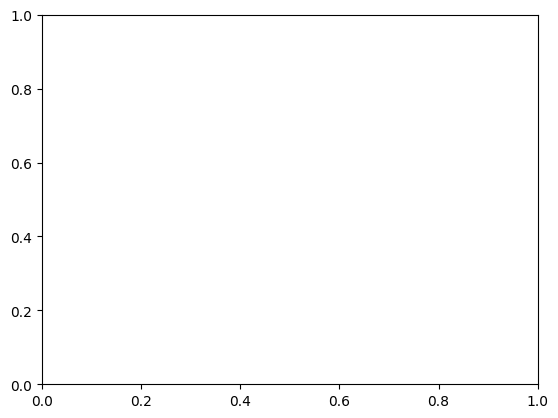

In [102]:
import matplotlib as mpl
fig, ax = plt.subplots()
width = 0.2
x_label = 'velocity ratio'
legend = 'Method'

x_values = (result_df[x_label].unique()).sort(axis=0)
labels = result_df[legend].unique()

cmap = mpl.cm.get_cmap("viridis", len(labels))
colors = cmap(np.linspace(0, 1, len(labels)))

for i, label in enumerate(labels):
    
    df = result_df[result_df[legend] == label]
    y_values = []
    rects = []

    for x_value in x_values:
        df_single = df[result_df[x_label] == x_value]
        y_values.append(df_single['Success'].sum() / df_single['Total samples'].sum())
    
    rects.append(ax.bar(np.arange(len(x_values)) + i*width, y_values, width, color=colors[i]))
    
plt.show()